In [ ]:
nt = NT()

ref = ['c', 'b', 'a', 'z']
nt1 = NTensor(torch.ones(2,3,4,5,6), ("c", "b", "a"))
nt2 = NTensor(torch.ones(2,3,4,6), ("z", "b", "a"))

res = broadcast(operator.add)(nt1, nt2)

res.data()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# D = observed heights of basketball players
lengths = np.array([195, 182])
# domain: mean height between 1.5m and 2.5m
mu = np.linspace(150, 250)
sigma = np.linspace(0, 15)[::-1]

# broadcast
mm, ss = np.meshgrid(mu, sigma)


array([[150.        , 152.04081633, 154.08163265, ..., 245.91836735,
        247.95918367, 250.        ],
       [150.        , 152.04081633, 154.08163265, ..., 245.91836735,
        247.95918367, 250.        ],
       [150.        , 152.04081633, 154.08163265, ..., 245.91836735,
        247.95918367, 250.        ],
       ...,
       [150.        , 152.04081633, 154.08163265, ..., 245.91836735,
        247.95918367, 250.        ],
       [150.        , 152.04081633, 154.08163265, ..., 245.91836735,
        247.95918367, 250.        ],
       [150.        , 152.04081633, 154.08163265, ..., 245.91836735,
        247.95918367, 250.        ]])

/home/gleech/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1720: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Text(0, 0.5, '$\\sigma$')

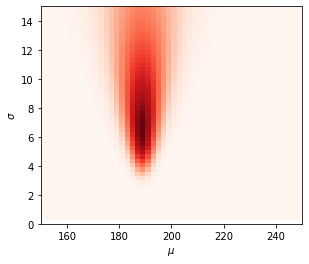

In [3]:
likelihood = stats.norm(mm, ss).pdf(lengths[0]) * stats.norm(mm, ss).pdf(lengths[1])
aspect = mm.max() / ss.max() / 3
extent = [mm.min(), mm.max(), ss.min(), ss.max()]
# extent = left right bottom top

plt.imshow(likelihood, cmap='Reds', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

So max likelihood implies mu=185, sigma=6

Text(0, 0.5, '$\\sigma$')

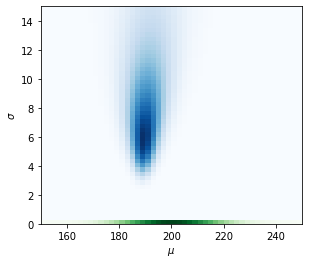

In [5]:
prior = stats.norm(200, 15).pdf(mm) * stats.cauchy(0, 10).pdf(ss)

plt.imshow(prior, cmap='Greens', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

unnormalized_posterior = prior * likelihood
posterior = unnormalized_posterior / np.nan_to_num(unnormalized_posterior).sum()
plt.imshow(posterior, cmap='Blues', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

In [8]:
import pymc3 as pm

with pm.Model():
    # priors
    mu = pm.Normal('mu', mu=200, sd=15)
    sigma = pm.HalfCauchy('sigma', 10)
    
    # likelihood
    observed = pm.Normal('observed', mu=mu, sd=sigma, observed=lengths)
    # sample
    trace = pm.sample(draws=10000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 1_000 tune and 10_000 draw iterations (1_000 + 10_000 draws total) took 9 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


(0, 15.0)

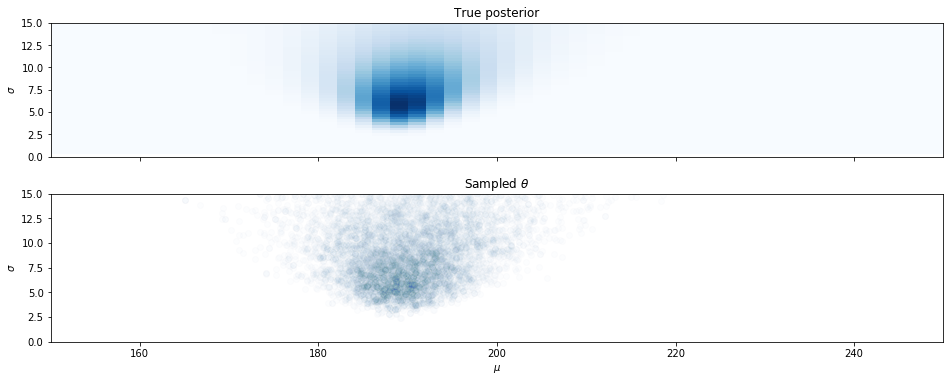

In [9]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize = (16, 6))
axes[0].imshow(posterior, cmap='Blues', extent=extent, aspect=1)
axes[0].set_ylabel('$\sigma$')
axes[1].scatter(trace['mu'], trace['sigma'], alpha=0.01)
axes[1].set_ylabel('$\sigma$')
axes[0].set_title('True posterior')
axes[1].set_title('Sampled $\\theta$')
plt.xlabel('$\mu$')
plt.xlim(150, mm.max())
plt.ylim(0, ss.max())

In [14]:
import torch 

a = torch.ones(3, 4)
b = torch.ones(4, 5)
c = torch.ones(5, 6)
d = torch.ones(6, 7)
torch.chain_matmul(a, b)#, c, d)
a = torch.ones(3, 3)
b = torch.ones(3, 3)
torch.chain_matmul(a, b)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [42]:
from functools import reduce

tensor = torch.ones(2,2,2) 
tensors = [tensor] *3
T = reduce(torch.matmul, tensors)
T

tensor([[[4., 4.],
         [4., 4.]],

        [[4., 4.],
         [4., 4.]]])

In [35]:
from functools import reduce

tensor = torch.ones(3,3,3,3)
tensors = [tensor] *4
cols = 10
tensors += [torch.ones(3,3,3,cols)]
T = reduce(torch.matmul, tensors)
T

tensor([[[[81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.]],

         [[81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.]],

         [[81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.]]],


        [[[81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.]],

         [[81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.],
          [81., 81., 81., 81., 81., 81., 81., 81., 81., 81.]],

         [[81., 81., 81., 81., 81., 81., 81., 81., 81., 81